# Projeto Final: Previsão de queda utilizando dispositivos IoT
<hr>

#### Estudo e análise de sensores para detecção de quedas como forma de prevenção de riscos a idosos <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('fall_detection.csv')

In [3]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


### Pergunta 1:
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [4]:
df.shape


(16382, 7)

### Pergunta 2:
Quantos tipos diferentes de dados existem no dataset do desafio?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     16382 non-null  int64  
 1   TIME         16382 non-null  float64
 2   SL           16382 non-null  float64
 3   EEG          16382 non-null  float64
 4   BP           16382 non-null  int64  
 5   HR           16382 non-null  int64  
 6   CIRCLUATION  16382 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


### Pergunta 3:
Qual é a média de batimentos cardíacos (HR) para a atividade de corrida (5) nos dados existentes?

In [6]:
mean_hr = df.loc[df['ACTIVITY'] == 5, 'HR'].mean()
print(round(mean_hr,1))

192.7


### Pergunta 4:
Quantos tipos distintos de atividades (ACTIVITY) existem?

In [7]:
df['ACTIVITY'].nunique()

6

### Pergunta 5:
Encontre o coeficiente de correlação de Pearson entre todas as variáveis de entrada ['TIME','SL','EEG','BP','HR','CIRCLUATION'] utilizando todos os tipos de atividades (ACTIVITY). Quais são as duas variáveis que possuem o maior coeficiente de correlação de Pearson em valor absoluto (abs(coef))?

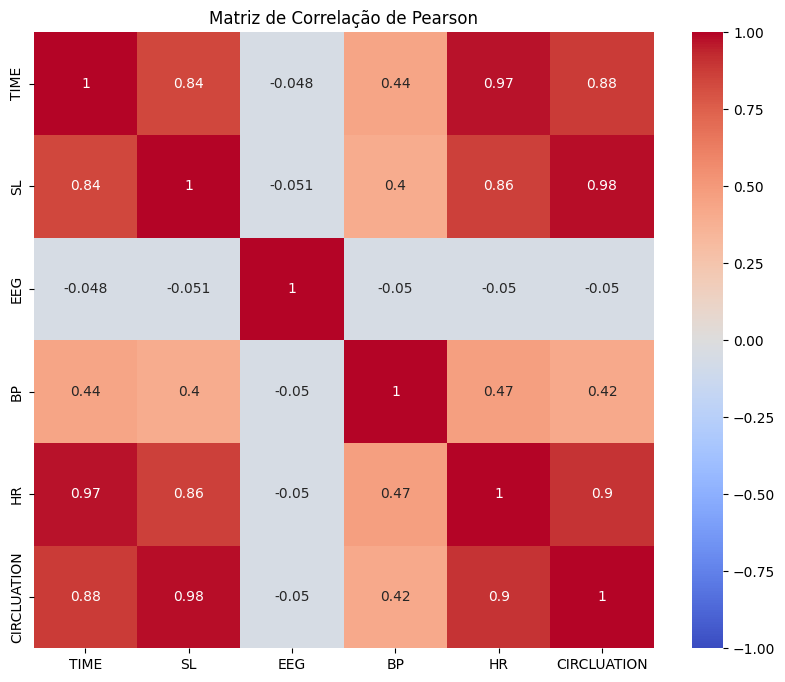

In [8]:
corr_matrix = df[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']].corr(method='pearson')

# Imprime a matriz de correlação
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()

In [9]:
abs_corr_matrix = corr_matrix.abs()

abs_corr_matrix = abs_corr_matrix.mask(np.triu(np.ones(abs_corr_matrix.shape)).astype(bool))

max_corr_pairs = abs_corr_matrix.stack().nlargest(1)

# Imprime os resultados
print(max_corr_pairs)

CIRCLUATION  SL    0.97806
dtype: float64


### Pergunta 6:
Construa um boxplot para as variáveis BP e HR. Utilizando esse boxplot, o que é possível dizer sobre essas variáveis?

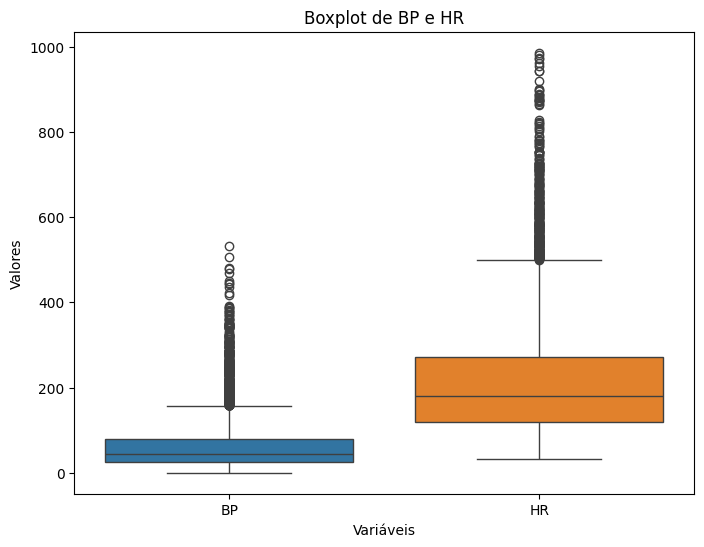

In [10]:
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura
sns.boxplot(data=df[['BP', 'HR']])
plt.title('Boxplot de BP e HR')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.show()

Existem possíveis outliers em ambas as variáveis.

### Pergunta 7:
Aplique a normalização StandardScaler() para todas as variáveis de entrada (['TIME','SL','EEG','BP','HR','CIRCLUATION']). Após essa normalização, qual é o menor valor existente para a variável SL?

In [11]:
features = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
min_sl = df['SL'].min()

print(round(min_sl,2))

-0.59


### Pergunta 8:
Após a normalização, aplique o train_test_split e divida os dados em 30% para teste e 70% para treino como mostrado no enunciado. Utilize como entrada as colunas ['TIME','SL','EEG','BP','HR','CIRCLUATION'] e como saída a coluna ACTIVITY. Quantas instâncias para o teste existem?

In [12]:
X = df[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']]
y = df['ACTIVITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Número de instâncias no conjunto de teste: {X_test.shape[0]}")

Número de instâncias no conjunto de teste: 4915


### Pergunta 9:
Após a normalização utilizando o StandardScaler() para os dados de entrada, aplique o modelo de classificação utilizando a regressão logística como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [13]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(round(accuracy,2))

0.38


### Pergunta 10:
Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de classificação Árvore de Decisão como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [14]:
dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(round(accuracy,2))

0.68


### Pergunta 11:
Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de classificação Floresta Randômica como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [15]:
rfc = RandomForestClassifier(n_estimators = 50,random_state=42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(round(accuracy,2))

0.77


### Pergunta 12:
Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de Gradiente Boosting como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [16]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.2,
max_features=6, max_depth = 5, random_state = 42)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(round(accuracy,2))

0.73


### Pergunta 13:
Encontre a matriz de confusão após aplicar os algoritmos KNN, Árvore de Decisão, SVM e a Regressão Logística como mostrado no enunciado. Analisando essa matriz para cada um dos algoritmos, qual desses algoritmos apresenta o maior percentual de identificação correta do evento de queda (ACTIVITY=3) para os dados de teste?

In [17]:
clf_svm=SVC(gamma='auto',kernel='rbf')

clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(round(accuracy,2))


0.4


In [18]:
models = {
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Regressão Logística': LogisticRegression(max_iter=1000)
}

# Resultados
results = {}

for name, model in models.items():
    # Treina o modelo
    model.fit(X_train, y_train)

    # Faz previsões
    y_pred = model.predict(X_test)

    # Calcula a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, y_pred)

    # Calcula o percentual de identificação correta da classe 3
    percentual_classe_3 = matriz_confusao[2, 2] / np.sum(matriz_confusao[2, :]) if np.sum(matriz_confusao[2, :]) else 0

    # Armazena os resultados
    results[name] = {
        'matriz_confusao': matriz_confusao,
        'percentual_classe_3': percentual_classe_3
    }

Resultados para KNN:
Matriz de Confusão:
[[941  11  70 132 150  68]
 [  2 111  28   3   0   0]
 [ 12  30 529 120  14  11]
 [ 44   9 170 720 155  17]
 [ 82   5  78 231 601  84]
 [ 43   1  21  73 115 234]]
Percentual de identificação correta da classe 3: 73.88%


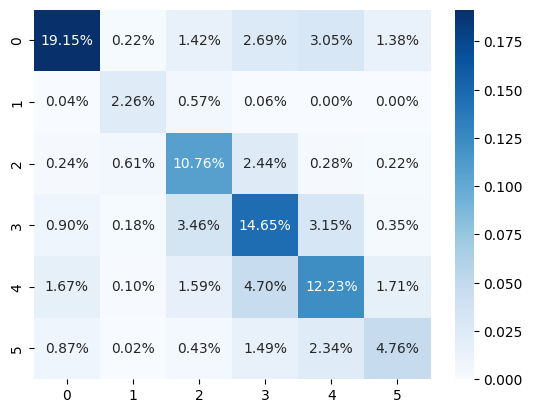

Resultados para Árvore de Decisão:
Matriz de Confusão:
[[1159    5   36   52   70   50]
 [   2  100   34    3    4    1]
 [  16   33  493  125   40    9]
 [  24    8  158  684  207   34]
 [  43    3   43  208  648  136]
 [  28    0   14   37  165  243]]
Percentual de identificação correta da classe 3: 68.85%


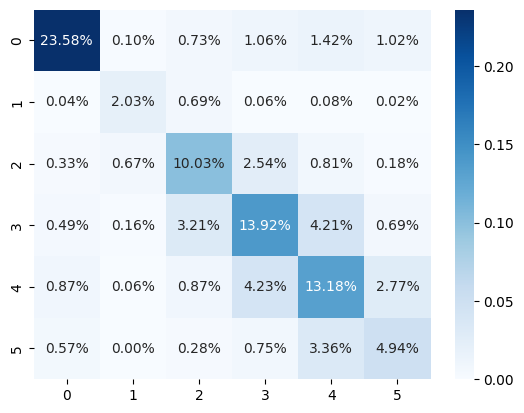

Resultados para SVM:
Matriz de Confusão:
[[942   0  81 137 212   0]
 [ 77   0  63   3   1   0]
 [204   0 259 127 126   0]
 [333   0 123 364 295   0]
 [422   0  97 166 396   0]
 [204   0  68  55 160   0]]
Percentual de identificação correta da classe 3: 36.17%


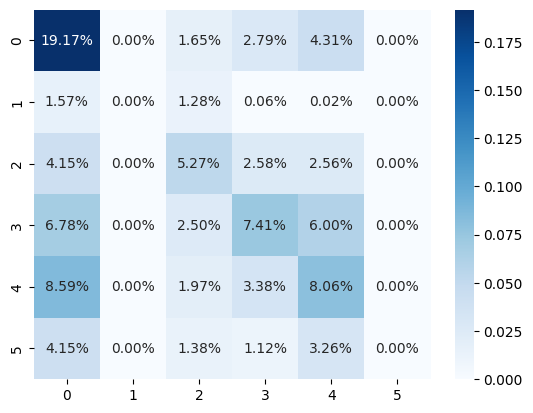

Resultados para Regressão Logística:
Matriz de Confusão:
[[979   0 100 213  80   0]
 [ 41   0  94   2   7   0]
 [205   0 235 171 105   0]
 [379   0 124 471 141   0]
 [417   0 150 335 179   0]
 [215   0  64 100 108   0]]
Percentual de identificação correta da classe 3: 32.82%


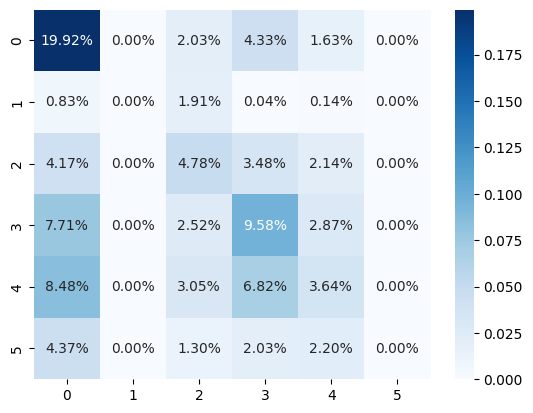

In [19]:
for name, result in results.items():
    print(f"Resultados para {name}:")
    print("Matriz de Confusão:")
    print(result['matriz_confusao'])
    print(f"Percentual de identificação correta da classe 3: {result['percentual_classe_3']:.2%}")

    # Exibe o mapa de calor da matriz de confusão
    sns.heatmap(result['matriz_confusao'] / np.sum(result['matriz_confusao']), annot=True, fmt='.2%', cmap='Blues')
    plt.show()